# PLANT LEAF DISEASE DETECTION (TOMATO)
     * Using convonutional neural network
     * Detect the disease part

Data set from kaggle 

In [1]:
!pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 588.3 MB 19 kB/s 
     |████████████████████████████████| 6.0 MB 65.7 MB/s 
     |████████████████████████████████| 1.7 MB 47.9 MB/s 
     |████████████████████████████████| 439 kB 72.6 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully u

In [2]:
# Tensor flow version
import tensorflow as tf
import keras
tf.__version__


'2.11.0'

## IMPORTING THE **DEPENDENCIES**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [1]:
#working on image data generator
!pip install keras
import keras
from keras_preprocessing.image import ImageDataGenerator,img_to_array
from keras_preprocessing.image import load_img
from keras.applications.vgg19 import VGG19,preprocess_input,decode_predictions



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#EDA

In [3]:
import os

len(os.listdir('/content/drive/MyDrive/dataset/New Plant Diseases Dataset(Augmented)/train'))
# we have 10 classes of images

10

In [4]:
#instead of rescaling we can use preprocessing
train_datagen=ImageDataGenerator(zoom_range=0.5,shear_range=0.3,horizontal_flip=True,preprocessing_function=preprocess_input)
valid_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)

In [5]:
train=train_datagen.flow_from_directory(directory='/content/drive/MyDrive/dataset/New Plant Diseases Dataset(Augmented)/train',
                                        target_size=(256,256),batch_size=32)
val=valid_datagen.flow_from_directory(directory='/content/drive/MyDrive/dataset/New Plant Diseases Dataset(Augmented)/valid',
                                        target_size=(256,256),batch_size=32)
#for training 18375 images
#for testing 4585 images

Found 18375 images belonging to 10 classes.
Found 4585 images belonging to 10 classes.


In [6]:
t_img,label=train.next()

In [7]:
# this is to represent batch
t_img.shape

(32, 256, 256, 3)

In [18]:
import matplotlib.pyplot as plt
def plotImage(img_arr,label):
  for im, l in zip(img_arr,label):
    plt.figure(figsize=(5,5))
    plt.imshow(im)
    plt.show()


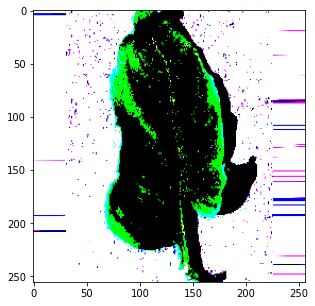

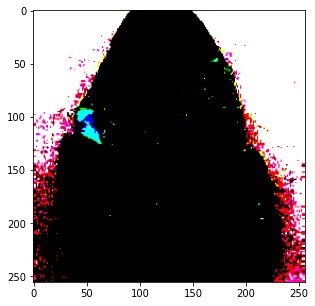

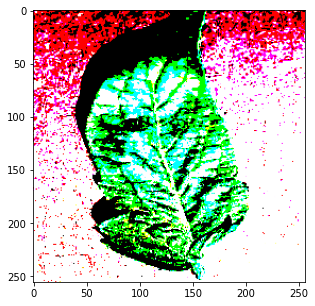

In [19]:
plotImage(t_img[:3],label[:3])

# Building Model

In [55]:
 from keras.layers import Dense,Flatten
 from keras.models import Model
 from keras.applications.vgg19 import VGG19
 import keras


In [58]:
base_model=VGG19(input_shape=(256,256,3),include_top=False)


In [59]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [60]:
for layer in base_model.layers:
  layer.trainable=False

In [61]:

X=Flatten()(base_model.output)
X=Dense(units=10,activation='softmax')(X)
 

In [62]:
#creating the model
model=Model(base_model.input,X)

In [63]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0   

In [64]:
model.compile(optimizer='adam',loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])

# Early Stopping and Model Check Point

In [65]:
from keras.callbacks import ModelCheckpoint,EarlyStopping
#early stopping
es=EarlyStopping(monitor='val_accuracy',min_delta=0.01,patience=3,verbose=1)
#model check point
mc=ModelCheckpoint(filepath='best_model.h5',
                   monitor='val_accuracy',
                   min_delta=0.01,
                   patience=3,
                   verbose=1,save_best_only=True)

cb=[es,mc]

In [66]:
his=model.fit_generator(train,
                        steps_per_epoch=16,
                        epochs=50,
                        verbose=1,
                        callbacks=cb,
                        validation_data=val,
                        validation_steps=16)

<ipython-input-66-c8eaa219365e>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  his=model.fit_generator(train,


Epoch 1/50
16/16 [==============================] - ETA: 0s - loss: 21.9809 - accuracy: 0.2520
Epoch 1: val_accuracy improved from -inf to 0.37891, saving model to best_model.h5
16/16 [==============================] - 200s 12s/step - loss: 21.9809 - accuracy: 0.2520 - val_loss: 16.0233 - val_accuracy: 0.3789
Epoch 2/50
16/16 [==============================] - ETA: 0s - loss: 11.0926 - accuracy: 0.4668
Epoch 2: val_accuracy improved from 0.37891 to 0.65820, saving model to best_model.h5
16/16 [==============================] - 194s 12s/step - loss: 11.0926 - accuracy: 0.4668 - val_loss: 6.6843 - val_accuracy: 0.6582
Epoch 3/50
16/16 [==============================] - ETA: 0s - loss: 5.3010 - accuracy: 0.6777
Epoch 3: val_accuracy improved from 0.65820 to 0.67578, saving model to best_model.h5
16/16 [==============================] - 169s 11s/step - loss: 5.3010 - accuracy: 0.6777 - val_loss: 6.7020 - val_accuracy: 0.6758
Epoch 4/50
16/16 [==============================] - ETA: 0s - los

In [67]:
h= his.history
h.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

# ACCURACY

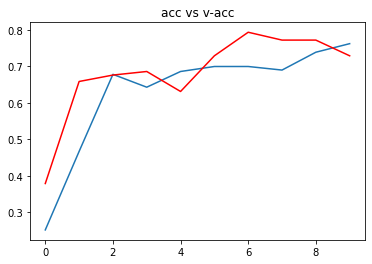

In [70]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'],c='red')
plt.title('acc vs v-acc')
plt.show()

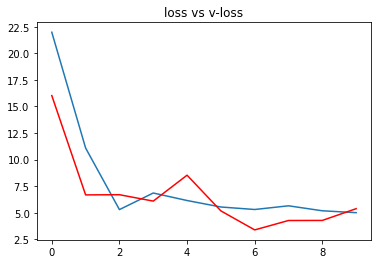

In [72]:
plt.plot(h['loss'])
plt.plot(h['val_loss'],c='red')
plt.title('loss vs v-loss');

In [73]:
#load best_model
from keras.models import load_model
model=load_model('/content/best_model.h5')

In [74]:
acc=model.evaluate_generator(val)[1]
print(f'The accuracy of your model is {acc*100} %')

<ipython-input-74-1c6f568dba74>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc=model.evaluate_generator(val)[1]


The accuracy of your model is 76.7284631729126 %


In [91]:
import numpy as np
def prediction(path):
  img=load_img(path,target_size=(256,256))
  i=img_to_array(img)
  im= preprocess_input(i)
 
  img=np.expand_dims(im,axis=0)
  pred=np.argmax(model.predict(img))
  print(f'The image belongs to {ref[pred]}')

In [90]:
ref=dict(zip(list(train.class_indices.values()),list(train.class_indices.keys())))

In [93]:
path='/content/drive/MyDrive/dataset/New Plant Diseases Dataset(Augmented)/train/Tomato___Bacterial_spot/00416648-be6e-4bd4-bc8d-82f43f8a7240___GCREC_Bact.Sp 3110.JPG'
prediction(path);

1/1 [==============================] - 0s 33ms/step
The image belongs to Tomato___Tomato_Yellow_Leaf_Curl_Virus
